**Predict how many medals a country will win in future olympics using past olympics data set.**

In [2]:
import pandas as pd
teams = pd.read_csv('teams.csv')

In [3]:
teams


,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [5]:
teams = teams[["team","country","year","athletes","age","height","prev_medals","medals"]]

slecting columns that will help us see data clearly

In [6]:
teams

,team,country,year,athletes,age,height,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,161.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,170.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,168.3,0.0,0
3,AFG,Afghanistan,1980,11,23.6,168.4,0.0,0
4,AFG,Afghanistan,2004,5,18.6,170.8,0.0,0
...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,179.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,177.8,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,171.9,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,174.4,4.0,0


**checking data correlation between columns, suppose we take medals column, so we have to check correlation of medals column with other columns, as there must be a strong correlation between column we are trying to predict i.e. medals and other columns which help us predict the medal column. **

In [9]:
teams.corr(numeric_only=True)["medals"]

,medals
year,-0.021603
athletes,0.840817
age,0.025096
height,0.141055
prev_medals,0.920048
medals,1.000000


0.7-.09 indicates srong correlation, therefore prev_medals and athletes columns are useful for prediction

now we will visualize the data to see correlation

In [12]:
import seaborn as sns

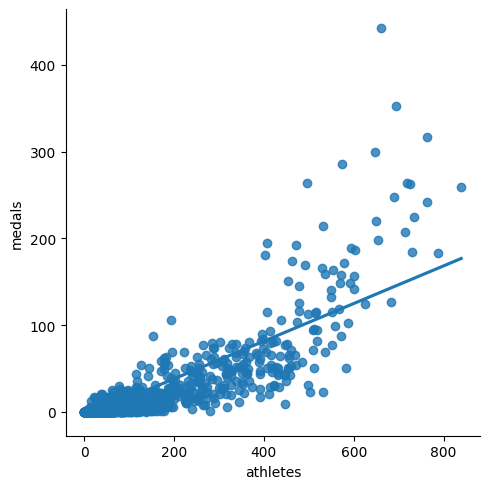

In [15]:
sns.lmplot(x="athletes", y="medals", data=teams, fit_reg=True, ci=None)

num of medals increase with num of athletes

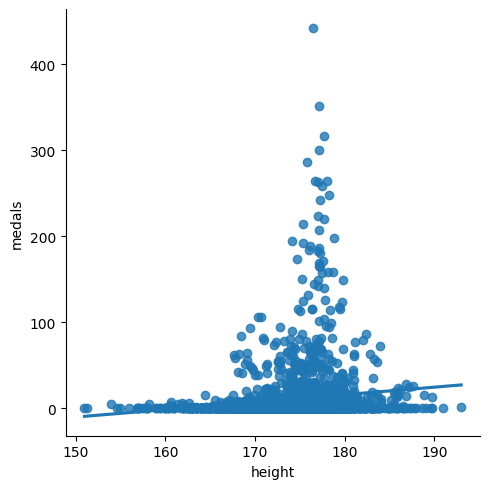

In [16]:
sns.lmplot(x="height", y="medals", data=teams, fit_reg=True, ci=None)

bad correlation as graph is not linear there is and interesting non linear correlation that height between 170 to 180 have high chances of winning a medal

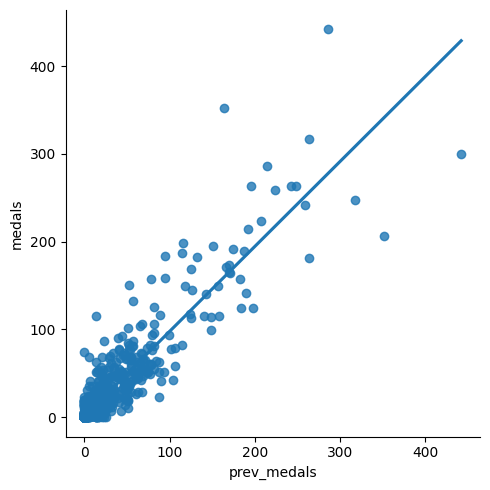

In [17]:
sns.lmplot(x="prev_medals", y="medals", data=teams, fit_reg=True, ci=None)

another strong correlation

now we will check how are medals distributed

<Axes: ylabel='Frequency'>

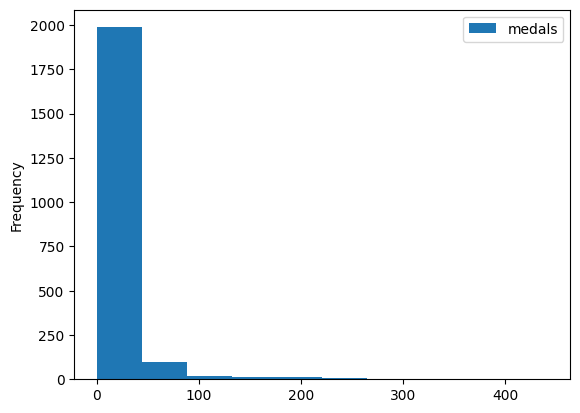

In [18]:
teams.plot.hist(y="medals")

now we can see that most of te country have won 0 or few medals, this makes data unfair or decreases our accuracy.
therefore its a good practice to pick a balanced column

**NOW WE WILL CLEAN THE DATA**

for that we have to find rows with null values

In [21]:
teams[teams.isnull().any(axis=1)]

,team,country,year,athletes,age,height,prev_medals,medals
19,ALB,Albania,1992,9,25.3,163.0,NaN,0
26,ALG,Algeria,1964,7,26.0,175.0,NaN,0
39,AND,Andorra,1976,3,28.3,174.7,NaN,0
50,ANG,Angola,1980,17,17.4,171.7,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,178.6,NaN,0
...,...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,20.5,157.0,NaN,0
2103,YAR,North Yemen,1984,3,27.7,163.3,NaN,0
2105,YEM,Yemen,1992,8,19.6,169.0,NaN,0
2112,YMD,South Yemen,1988,5,23.6,175.0,NaN,0


for this project we will drop rows with missing values

In [22]:
teams = teams.dropna()

Now we will split the data, for this purpose, we will see the year column,and in our train dataset put years before 2012 and in test put years after and 2012 as we cant put future data(i.e. 2012 and 2016) in train data set as predictions are based on past.

In [23]:
train = teams[teams["year"] < 2012].copy()

In [24]:
test = teams[teams["year"] >= 2012].copy()

.copy() is used so new explicit datasets are made for train and test and not affecting the original dataset

In [26]:
train.shape

(1609, 8)

In [27]:
test.shape

(405, 8)

we have 80 20 split

now we build our model

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
reg = LinearRegression()

In [31]:
predictors = ["athletes", "prev_medals"]
target = "medals"

predictors are independent variables, medals is dependent on these and predicted by these

In [32]:
reg.fit(train[predictors], train[target])

LinearRegression()

In [34]:
predictions = reg.predict(test[predictors])

this is to make predictions on test data set, i.e. generate a medals or target column for test data set based on our model so that we can compare this one with the original test data set medals or target column

In [35]:
predictions

array([-9.61221245e-01, -1.17633261e+00, -1.42503158e+00, -1.71184673e+00,
        2.15562926e+00,  3.91463636e+00, -1.71184673e+00, -1.85525431e+00,
        3.67563128e-01, -2.77770967e-01, -1.85525431e+00, -1.49673537e+00,
        4.67519911e+01,  2.87550937e+01,  4.58450091e+00,  2.54773581e+00,
       -1.85525431e+00, -1.64014295e+00, -1.85525431e+00, -1.85525431e+00,
        1.46556876e+02,  1.20571799e+02,  6.56314795e+00,  3.95275254e+00,
        7.34283247e+00,  1.03117468e+01,  5.19171882e+00,  3.58517645e+00,
       -1.64014295e+00, -1.64014295e+00, -1.56843916e+00, -1.20992022e+00,
       -1.71184673e+00, -1.42503158e+00,  1.17929959e+01,  1.00049298e+01,
       -1.78355052e+00, -1.71184673e+00, -1.56843916e+00, -1.56843916e+00,
       -1.99866189e+00, -1.99866189e+00, -1.56843916e+00, -1.35332779e+00,
       -1.92695810e+00, -1.92695810e+00,  3.28912706e+01,  2.53042547e+01,
       -1.78355052e+00, -1.28162400e+00, -1.85525431e+00, -3.87590939e-01,
        7.83480779e+01,  

as we can see this is numpy array with negative and decimal value but num of medals cant be negative or in decimals so we rescale

In [37]:
test["predictions"] = predictions
test.loc[test["predictions"] < 0, "predictions"] = 0
test["predictions"] = test["predictions"].round()

In [38]:
test


,team,country,year,athletes,age,height,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,171.7,1.0,1,0.0
7,AFG,Afghanistan,2016,3,24.7,173.7,1.0,0,0.0
24,ALB,Albania,2012,10,25.7,176.8,0.0,0,0.0
25,ALB,Albania,2016,6,23.7,176.2,0.0,0,0.0
37,ALG,Algeria,2012,39,24.8,174.3,2.0,1,2.0
...,...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,169.7,0.0,0,0.0
2131,ZAM,Zambia,2012,7,22.6,176.2,0.0,0,0.0
2132,ZAM,Zambia,2016,7,24.1,175.2,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,174.4,4.0,0,2.0


values are rounded now, now we will check for error

In [39]:
from sklearn.metrics import mean_absolute_error as mae
error = mae(test["medals"], test["predictions"])

MAE: This is the average of the absolute differences between the predicted and actual values.

this will compare the predictions and actual result

Interpreting Error

The lower the error value, the better your model is performing. An error of 0 would indicate a perfect model that makes predictions with 100% accuracy. However, in practice, achieving zero error is often impossible.

The acceptable level of error depends on your specific application and the consequences of inaccurate predictions. You'll need to consider the trade-off between model complexity and error reduction. A more complex model might have lower error but could be prone to overfitting, while a simpler model might have higher error but better generalization ability.

Minimizing Error

There are several techniques to minimize error in machine learning, including:

Feature Engineering: Selecting and transforming relevant features to improve the model's ability to learn patterns.
Model Selection: Choosing the right type of model for your data and task.
Hyperparameter Tuning: Adjusting the model's settings to optimize its performance.
Regularization: Adding penalties to the model's complexity to prevent overfitting.

In [40]:
error

3.2987654320987656

In [41]:
teams.describe()["medals"]

,medals
count,2014.000000
mean,10.990070
std,33.627528
min,0.000000
25%,0.000000
50%,0.000000
75%,5.000000
max,442.000000


error should generally be lower than the standard deviation ie std, if its not there is something wrong with the model, in this case error is far below std, so now we can manually check the values

In [42]:
test[test["team"]=="USA"]

,team,country,year,athletes,age,height,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,178.3,317.0,248,285.0
2054,USA,United States,2016,719,26.4,178.0,248.0,264,236.0


In [45]:
test[test["team"]=="IND"]

,team,country,year,athletes,age,height,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,174.2,3.0,6,7.0
908,IND,India,2016,130,26.1,170.0,6.0,2,12.0


Now we can see that, error percentage is alright for bigger values but not good for smaller like india

now we will see the difference between no. of actual and predict3ed medals

In [46]:
errors = (test["predictions"] - test["medals"]).abs()

In [47]:
errors

,0
6,1.0
7,0.0
24,0.0
25,0.0
37,1.0
...,...
2111,0.0
2131,0.0
2132,0.0
2142,2.0


for better understanding lets this group by countries

In [48]:
errorbyteam = errors.groupby(test["team"]).mean()


this tells us difference between actual and predicted medals between diff countries

In [67]:
errorbyteam

,0
team,
AFG,0.5
ALB,0.0
ALG,1.5
AND,0.0
ANG,0.0
...,...
VIE,1.0
VIN,0.0
YEM,0.0


now we get avg medals won by countries

In [68]:
medalsbyteam = test["medals"].groupby(test["team"]).mean()


In [69]:
errorratio = errorbyteam / medalsbyteam

now we have missing values i.e 0/0 or inf value i.e avg medals =0 e.g 1/0 = inf. so we clean these

In [70]:
import numpy as np
errorratio[~pd.isnull(errorratio)]
errorratio = errorratio[np.isfinite(errorratio)]

In [71]:
errorratio

,0
team,
AFG,1.000000
ALG,1.000000
ARG,0.853659
ARM,0.428571
AUS,0.367347
...,...
UKR,0.951220
USA,0.126953
UZB,0.625000


<Axes: ylabel='Frequency'>

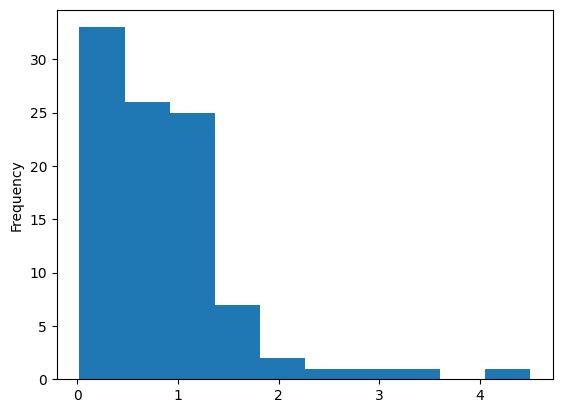

In [72]:
errorratio.plot.hist()

Now we can see that for many countries error ratio < 0.5 i.e. there is less diff between predicted and actual medals but form some its is greater than 2 which is double the predicted

In [73]:
errorratio.sort_values()

,0
team,
FRA,0.022472
CAN,0.048387
NZL,0.063492
RUS,0.082353
ITA,0.121429
...,...
MAR,2.000000
EGY,2.400000
HKG,3.000000


In [74]:
# Reset index to access 'team' as a column:
errorratio = errorratio.reset_index()

# Rename the column to a more descriptive name if you like:
errorratio = errorratio.rename(columns={0: 'error_ratio'})

# Add the average medals column:
errorratio['avg_medals'] = errorratio['team'].map(medalsbyteam) # Use map to add corresponding medal counts

# Sort the table by error_ratio and include avg_medals
sorted_error_ratio = errorratio.sort_values(by=['error_ratio'])[['team', 'error_ratio', 'avg_medals']]

# Display the sorted table:
print(sorted_error_ratio)

   team  error_ratio  avg_medals
31  FRA     0.022472        89.0
15  CAN     0.048387        62.0
68  NZL     0.063492        31.5
77  RUS     0.082353       127.5
47  ITA     0.121429        70.0
..  ...          ...         ...
58  MAR     2.000000         1.0
25  EGY     2.400000         2.5
39  HKG     3.000000         0.5
71  POR     3.333333         1.5
5   AUT     4.500000         1.0

[97 rows x 3 columns]


errorratio

i.e. error is low for countries with higher medals

**Now to check if this model is good or not, we need to see our business purpose. for example if we want to predict for countries with higher number of medals this model works good or countries with less errorratio.**

**TO IMPROVE MODEL WHAT I COULD DO**

Try different models

Test error more effectively



Use different datset

Add in more predictors